# lib & data imports

In [186]:
# standard data imports
%reload_ext nb_black
import pandas as pd
import numpy as np

# plotting imports
from matplotlib import pyplot as plt
import plotly
import seaborn as sns

%matplotlib inline
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
df = pd.read_csv("train_data.csv")
df_dict = pd.read_csv("train_data_dictionary.csv")
sample_sub = pd.read_csv("sample_sub.csv")

<IPython.core.display.Javascript object>

# Data Exploration

In [64]:
df.head(25)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
8,9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60
9,10,10,e,1,X,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056.0,31-40


<IPython.core.display.Javascript object>

In [11]:
# looing at the size of the data set
df.shape

(318438, 18)

<IPython.core.display.Javascript object>

- there are 318,438 records in this data set

In [8]:
# datatype info for each category
# no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

<IPython.core.display.Javascript object>

In [65]:
# breaking the data into regions to create smaller chunks of data to look at for similar areas
df.Hospital_region_code.unique()

region_x = df[df.Hospital_region_code == "X"]
region_y = df[df.Hospital_region_code == "Y"]
region_z = df[df.Hospital_region_code == "Z"]

<IPython.core.display.Javascript object>

In [16]:
print(region_x.shape)
print(region_y.shape)
print(region_z.shape)

(133336, 18)
(122428, 18)
(62674, 18)


<IPython.core.display.Javascript object>

Region X: 133,336 records

Region Y: 122,428 records

Region Z: 62,674 records

In [19]:
region_x.Hospital_code.value_counts()

23    26566
6     20425
14    17328
28    17137
29    11311
25     9834
10     9435
24     7992
17     5501
5      5261
7      1306
4      1240
Name: Hospital_code, dtype: int64

<IPython.core.display.Javascript object>

- There are 5 hospitals with over 10,000 records available and around 100,000 available just between the 5 with the highest count

In [26]:
x23.shape

(26566, 18)

<IPython.core.display.Javascript object>

In [24]:
x23.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
16,17,23,a,6,X,4,radiotherapy,Q,F,3.0,63418,8.0,Urgent,Extreme,4,71-80,2933.0,0-10
48,49,23,a,6,X,2,TB & Chest disease,R,F,3.0,44201,2.0,Emergency,Extreme,2,51-60,4638.0,11-20
49,50,23,a,6,X,2,TB & Chest disease,R,F,1.0,44201,2.0,Emergency,Extreme,4,51-60,5327.0,51-60


<IPython.core.display.Javascript object>

**hospital 23:**
* type: a
* city code: 6

In [30]:
# listed departments in x-23
x23.Department.unique()

array(['anesthesia', 'radiotherapy', 'TB & Chest disease', 'gynecology',
       'surgery'], dtype=object)

<IPython.core.display.Javascript object>

In [32]:
# number of records listed for each department
x23.groupby("Department").size()

Department
TB & Chest disease      920
anesthesia             4582
gynecology            18415
radiotherapy           2547
surgery                 102
dtype: int64

<IPython.core.display.Javascript object>

In [34]:
x23.Department.groupby("Type of Admission").size()

KeyError: 'Type of Admission'

<IPython.core.display.Javascript object>

# Age

**Stay to stay_num**

In [ ]:
# new column created converting Stay column object to a float that = the first item in the string
region_x["stay_num"] = pd.to_numeric(region_x.Stay.str.slice(0, 1), errors="coerce")

In [110]:
# filled NaN values from strings "More than 100 Days" with value of 100
region_x.stay_num.fillna(100)

2         3.0
5         1.0
7         4.0
9         3.0
14        0.0
         ... 
318430    2.0
318431    1.0
318433    1.0
318434    3.0
318435    1.0
Name: stay_num, Length: 133336, dtype: float64

<IPython.core.display.Javascript object>

In [ ]:
# adding 0.5 to each value before multiplying by 10 to avoid getting 0 for ranges 0-10 instead of 5
region_x.stay_num = region_x.stay_num + 0.5

In [ ]:
# multiplying stay_num ints by 10 to get middle of each stay range as a number
region_x.stay_num = region_x.stay_num * 10

**Age to age_num**

In [ ]:
# create age_num column to convert object to number representing the middle of age range
region_x["age_num"] = pd.to_numeric(region_x.Age.str.slice(0, 1))

In [ ]:
# now multiply the number * 10 and then add 5
region_x.age_num = (region_x.age_num * 10) + 5
region_x.head()

**Age groups**

In [120]:
# lets remove the subset of data for individual hospitals
x23 = region_x[region_x.Hospital_code == 23]
x6 = region_x[region_x.Hospital_code == 6]
x14 = region_x[region_x.Hospital_code == 14]
x28 = region_x[region_x.Hospital_code == 28]
x29 = region_x[region_x.Hospital_code == 29]

<IPython.core.display.Javascript object>

In [122]:
x23["Type of Admission"].value_counts()

Trauma       14374
Emergency     8540
Urgent        3652
Name: Type of Admission, dtype: int64

<IPython.core.display.Javascript object>

In [129]:
# divide x23 records into groups based on admission type
x23_trauma = x23[x23["Type of Admission"] == "Trauma"]
x23_emerg = x23[x23["Type of Admission"] == "Emergency"]
x23_urgent = x23[x23["Type of Admission"] == "Urgent"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [130]:
x23.age_num.corr(x23.stay_num)

0.07731984899890602

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Age vs. LOS: trauma admissions

In [133]:
x23_trauma["Severity of Illness"].value_counts()

Moderate    8226
Minor       3599
Extreme     2549
Name: Severity of Illness, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [137]:
# there are enough records for each trauma severity to break down even further into groups to test
x23_trauma_extreme = x23_trauma[x23_trauma["Severity of Illness"] == "Extreme"]
x23_trauma_moderate = x23_trauma[x23_trauma["Severity of Illness"] == "Moderate"]
x23_trauma_minor = x23_trauma[x23_trauma["Severity of Illness"] == "Minor"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [140]:
x23_trauma_extreme.age_num.corr(x23_trauma_extreme.stay_num)

0.030889598829328298

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [141]:
x23_trauma_moderate.age_num.corr(x23_trauma_moderate.stay_num)

0.06577450805721645

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [142]:
x23_trauma_minor.age_num.corr(x23_trauma_minor.stay_num)

0.03388205319158343

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [158]:
np.percentile(x23_trauma_moderate.age_num, 66)

55.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [194]:
lower = x23_trauma_moderate[x23_trauma_moderate.age_num <= 35]
middle = x23_trauma_moderate[
    (x23_trauma_moderate.age_num > 35) & (x23_trauma_moderate.age_num < 55)
]
upper = x23_trauma_moderate[x23_trauma_moderate.age_num >= 55]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [184]:
print(lower.shape)
print(middle.shape)
print(upper.shape)

(2896, 20)
(1856, 20)
(3474, 20)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

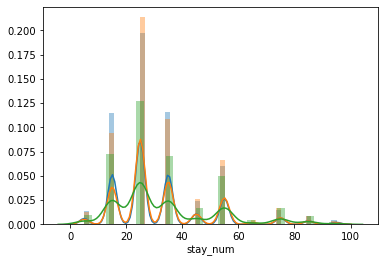

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [197]:
sns.distplot(lower.stay_num)
sns.distplot(middle.stay_num)
sns.distplot(upper.stay_num)
plt.show()

In [198]:
lower_stay = lower.stay_num
middle_stay = middle.stay_num
upper_stay = upper.stay_num

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

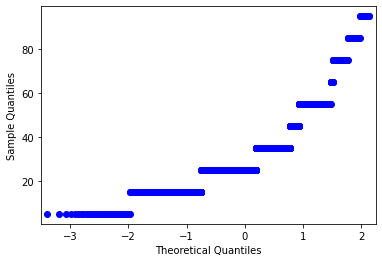

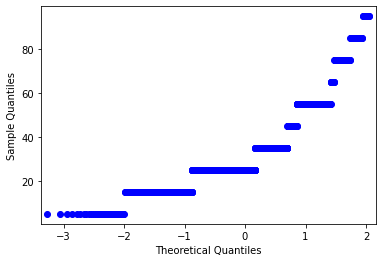

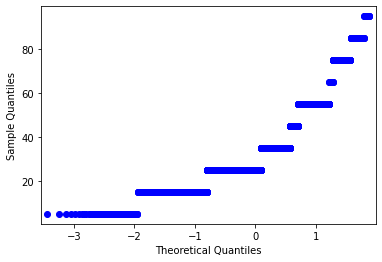

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [203]:
qqplot(lower_stay, line="s")
plt.show()
qqplot(middle_stay)
plt.show()
qqplot(upper_stay)
plt.show()